<a href="https://colab.research.google.com/github/Katla19/scaler-clustering/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
s=pd.read_csv('s.csv')

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
s.head(5)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
s.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [ ]:
s.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [ ]:
average_ctc = s['ctc'].mean()
print(f"The average CTC is: {average_ctc}")

The average CTC is: 2271685.0419931696


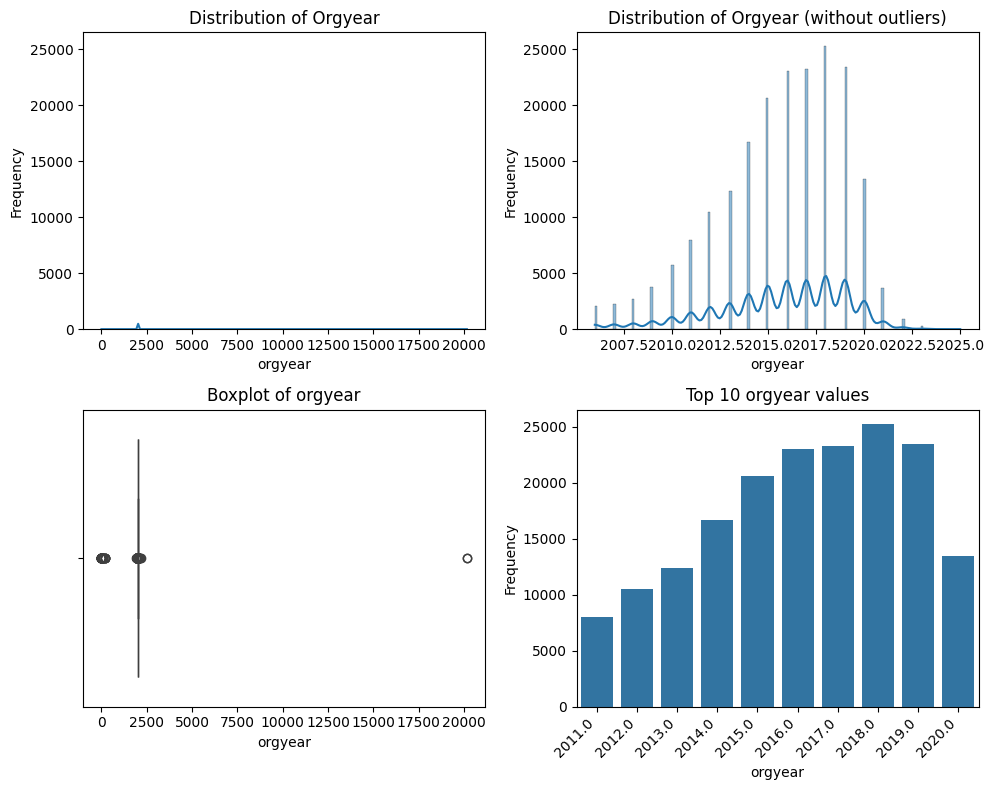

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(s['orgyear'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Orgyear')
axes[0, 0].set_xlabel('orgyear')
axes[0, 0].set_ylabel('Frequency')

Q1 = s['orgyear'].quantile(0.25)
Q3 = s['orgyear'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
s_filtered = s[(s['orgyear'] >= lower_bound) & (s['orgyear'] <= upper_bound)]

sns.histplot(s_filtered['orgyear'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Orgyear (without outliers)')
axes[0, 1].set_xlabel('orgyear')
axes[0, 1].set_ylabel('Frequency')

sns.boxplot(x='orgyear', data=s, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of orgyear')
axes[1, 0].set_xlabel('orgyear')

top_10_ctc = s['orgyear'].value_counts().nlargest(10)
sns.barplot(x=top_10_ctc.index, y=top_10_ctc.values, ax=axes[1,1])
axes[1, 1].set_title('Top 10 orgyear values')
axes[1,1].set_xlabel('orgyear')
axes[1,1].set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
s = s[(s['orgyear'] >= lower_bound) & (s['orgyear'] <= upper_bound)]
s.reset_index(drop=True, inplace=True)

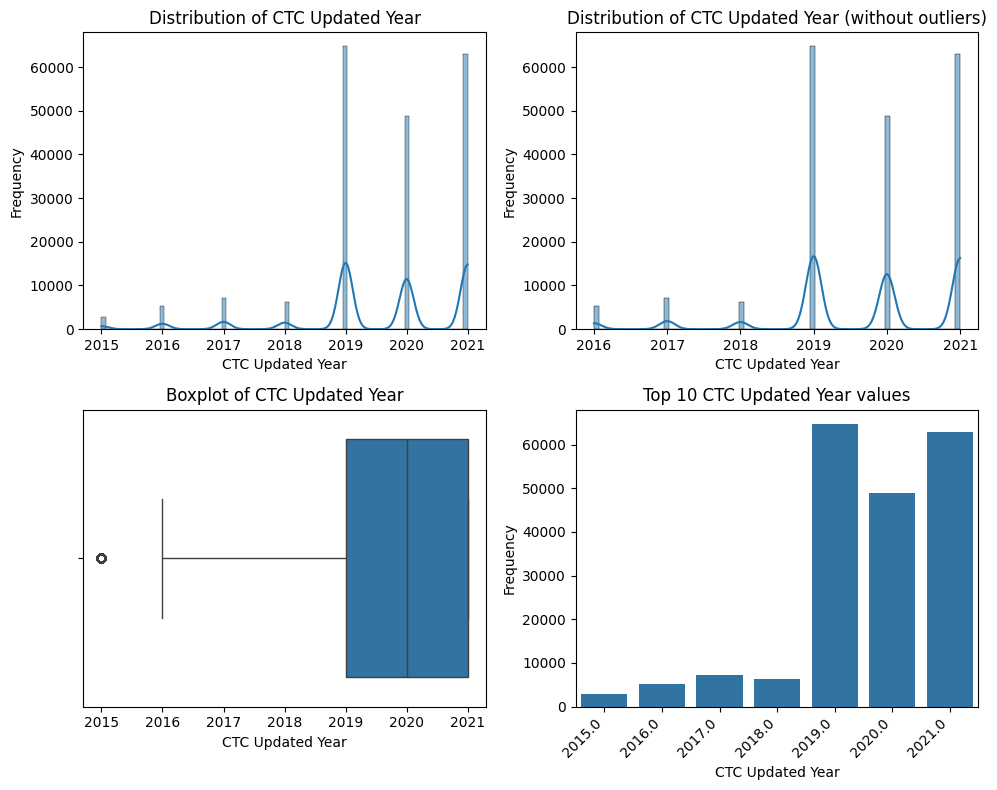

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(s['ctc_updated_year'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of CTC Updated Year')
axes[0, 0].set_xlabel('CTC Updated Year')
axes[0, 0].set_ylabel('Frequency')

Q1 = s['ctc_updated_year'].quantile(0.25)
Q3 = s['ctc_updated_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
s_filtered = s[(s['ctc_updated_year'] >= lower_bound) & (s['ctc_updated_year'] <= upper_bound)]

sns.histplot(s_filtered['ctc_updated_year'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of CTC Updated Year (without outliers)')
axes[0, 1].set_xlabel('CTC Updated Year')
axes[0, 1].set_ylabel('Frequency')

sns.boxplot(x='ctc_updated_year', data=s, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of CTC Updated Year')
axes[1, 0].set_xlabel('CTC Updated Year')

top_10_ctc_updated_year = s['ctc_updated_year'].value_counts().nlargest(10)
sns.barplot(x=top_10_ctc_updated_year.index, y=top_10_ctc_updated_year.values, ax=axes[1,1])
axes[1, 1].set_title('Top 10 CTC Updated Year values')
axes[1,1].set_xlabel('CTC Updated Year')
axes[1,1].set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

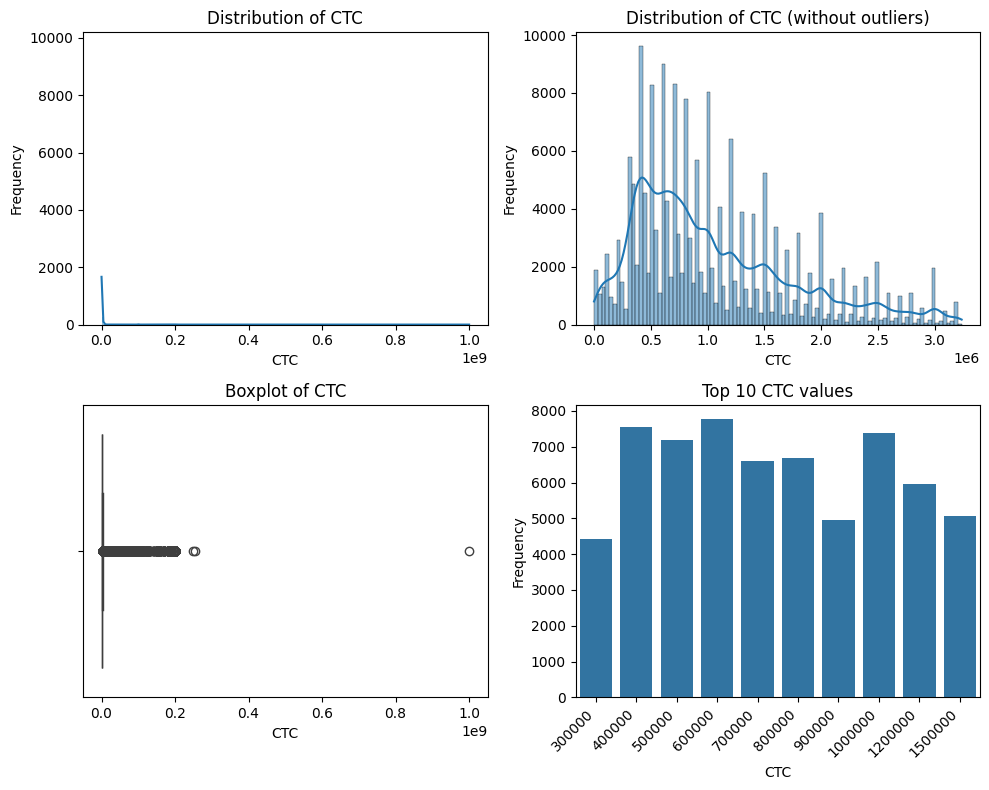

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(s['ctc'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of CTC')
axes[0, 0].set_xlabel('CTC')
axes[0, 0].set_ylabel('Frequency')

Q1 = s['ctc'].quantile(0.25)
Q3 = s['ctc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
s_filtered = s[(s['ctc'] >= lower_bound) & (s['ctc'] <= upper_bound)]

sns.histplot(s_filtered['ctc'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of CTC (without outliers)')
axes[0, 1].set_xlabel('CTC')
axes[0, 1].set_ylabel('Frequency')

sns.boxplot(x='ctc', data=s, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of CTC')
axes[1, 0].set_xlabel('CTC')

top_10_ctc = s['ctc'].value_counts().nlargest(10)
sns.barplot(x=top_10_ctc.index, y=top_10_ctc.values, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 CTC values')
axes[1, 1].set_xlabel('CTC')
axes[1, 1].set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


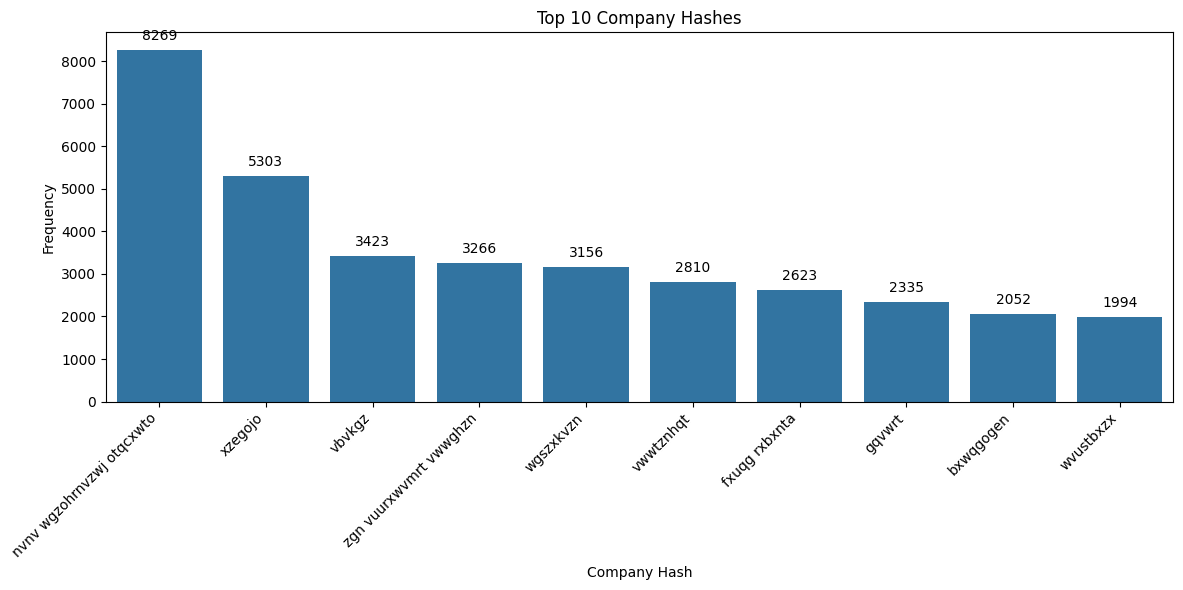

In [ ]:
top_10_companies = s['company_hash'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Company Hash")
plt.ylabel("Frequency")
plt.title("Top 10 Company Hashes")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
email_counts = s['email_hash'].value_counts().nlargest(10)
email_counts

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8


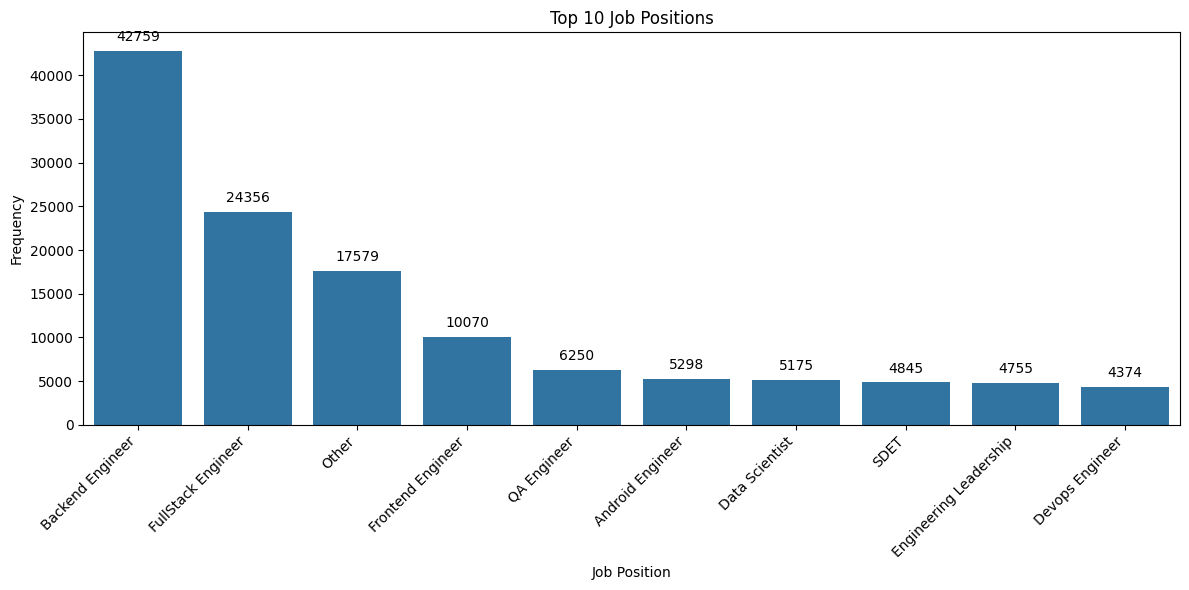

In [ ]:
top_10_job_positions = s['job_position'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_job_positions.index, y=top_10_job_positions.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Job Position")
plt.ylabel("Frequency")
plt.title("Top 10 Job Positions")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
s = s.drop(columns=['Unnamed: 0'])

In [ ]:
print("Unique Values")
for col in s.columns:
  print(f'{col}: {s[col].nunique()}')

Unique Values
company_hash: 35506
email_hash: 146761
orgyear: 20
ctc: 3296
job_position: 969
ctc_updated_year: 7


In [ ]:
s['orgyear'] = s['orgyear'].round().astype('Int64')
s['orgyear'].unique()

<IntegerArray>
[2016, 2018, 2015, 2017, 2019, 2020, 2012, 2013, 2006, 2014, 2011, 2021, 2008,
 2022, 2009, 2010, 2007, 2023, 2024, 2025]
Length: 20, dtype: Int64

In [ ]:
import numpy as np
current_year = pd.to_datetime('today').year
s['orgyear'] = s['orgyear'].apply(lambda x: np.nan if (x <= 1900 or x > current_year or x > 2025 or x == 0) else x)
s['orgyear'] = s['orgyear'].round().astype('Int64')
s['orgyear'].unique()

<IntegerArray>
[2016, 2018, 2015, 2017, 2019, 2020, 2012, 2013, 2006, 2014, 2011, 2021, 2008,
 2022, 2009, 2010, 2007, 2023, 2024, 2025]
Length: 20, dtype: Int64

In [ ]:
import re
def print_special_chars(df, column_name):
  special_chars = set()
  for value in df[column_name]:
      if isinstance(value, str):
          for char in value:
              if not re.match(r"[\w\s]", char):
                  special_chars.add(char)
  if special_chars:
    print(f"Special characters in '{column_name}': {special_chars}")
  else:
    print(f"No special characters found in '{column_name}'")
print_special_chars(s, 'email_hash')
print_special_chars(s, 'company_hash')

No special characters found in 'email_hash'
No special characters found in 'company_hash'


In [ ]:
print("Null Values")
for col in s.columns:
  print(f'{col}: {s[col].isnull().sum()}')

Null Values
company_hash: 44
email_hash: 0
orgyear: 0
ctc: 0
job_position: 51271
ctc_updated_year: 0


In [ ]:
print("Null Values percentage")
for col in s.columns:
  print(f'{col}: {s[col].isnull().sum()/len(s[col])*100}')

Null Values percentage
company_hash: 0.022223007884117116
email_hash: 0.0
orgyear: 0.0
ctc: 0.0
job_position: 25.895359936967466
ctc_updated_year: 0.0


In [ ]:
from sklearn.impute import KNNImputer
orgyear = s[['orgyear']]
imputer = KNNImputer(n_neighbors=5)
orgyear_imputed = imputer.fit_transform(orgyear)
s['orgyear'] = orgyear_imputed
print(f"Null values in 'orgyear' after imputation: {s['orgyear'].isnull().sum()}")

Null values in 'orgyear' after imputation: 0


In [ ]:
grouped = s.groupby(['ctc', 'ctc_updated_year'])
# Mode imputation to 'job_position' and 'company_hash' within each group
for col in ['job_position', 'company_hash']:
    s[col] = grouped[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
print("Null Values after imputation")
for col in s.columns:
    print(f'{col}: {s[col].isnull().sum()}')


Null Values after imputation
company_hash: 0
email_hash: 0
orgyear: 0
ctc: 0
job_position: 0
ctc_updated_year: 0


In [ ]:
duplicate_rows = s[s.duplicated(keep=False)]
duplicate_rows

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
12,mvqwrvjo wgqugqvnt mvzpxzs,7f24d2f5171ea469482a9966832237bc023678883ecd0c...,2020.0,800000,Backend Engineer,2020.0
15,bgsrxd,3b99c28818530737364245236fba9a821187fc38cd6445...,2012.0,2030000,Backend Engineer,2019.0
18,mvlvl exzotqc,62d2e04b44c8bf2f6ec15d5b4c259c06199f598dc51816...,2018.0,100000,Other,2021.0
47,rgfto wgbuvzxto xzw,7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...,2020.0,3010000,Backend Engineer,2019.0
48,vuucxtfd ucn rna,3e0f073e09d14faecf2e754fe588e2b056cac1b9bc1efe...,2013.0,2700000,Backend Engineer,2021.0
...,...,...,...,...,...,...
197478,vbagwo,30aca42fcbf43f26e631675fd47846f77d60bc9fd78945...,2015.0,1960000,Backend Engineer,2021.0
197488,oxtbtzo,95341b9a643c7f1f5bc1e084882e5ed8b0700fc2526d70...,2010.0,1980000,Backend Engineer,2021.0
197777,xmb,4b608bdee9ba68fbe3846d8828e6485bd33981c425e0c3...,2014.0,1800000,Backend Engineer,2020.0
197826,ntowg,2efb710c0296b195e030d6388847fa35c4c5ddd3b72b10...,2020.0,1600000,Backend Engineer,2021.0


In [ ]:
filtered = s[s['company_hash'] == 'wtqtzwt xzw']
duplicates = filtered[filtered.duplicated(keep=False)]
duplicates

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
64034,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
93998,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0


In [ ]:
s = s.drop_duplicates()
s.shape

(188827, 6)

In [ ]:
matching_rows = s[(s['company_hash'] == 'wtqtzwt xzw') &
                  (s['email_hash'] == 'bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8ef95d6536b8e3a2adf') &
                  (s['orgyear'] == 2014.0) &
                  (s['ctc'] == 1000000) &
                  (s['job_position'] == 'FullStack Engineer') &
                  (s['ctc_updated_year'] == 2019.0)]
matching_rows

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
64034,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0


In [ ]:
unique_emails = s['email_hash'].nunique()
print(f"Unique email_hash count: {unique_emails}")
total_emails = s['email_hash'].shape[0]
print(f"Total email_hash count: {total_emails}")
email_counts = s['email_hash'].value_counts()
print(email_counts)

Unique email_hash count: 146761
Total email_hash count: 188827
email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66    8
                                                                   ..
69d9dd66a46db51b6505459052a4de64ed21d62ae6c8dfc489b40c7cb2b1ae46    1
48722cef91d29364dc0bb36c98d3e49c84569cf83914df3feda6bd80f565e557    1
07bd80cd23834c1ab559c96dbecd9d914a6f1ea4dd398c64662e61d305ca8190    1
a1cdf489051d971fbc8f765346a63e95b1f09e1cc41593e2ec3876b82d02979d    1
5f88e29ea499acce84670ffcab82b9fa93ed1fa4914e0abb3b9775eb6f5b9616    1
Name: count, Length: 146761, dtype: int64


In [ ]:
duplicate_emails = email_counts[email_counts > 1]
print(f"Emails appearing more than once: {duplicate_emails.shape[0]}")

Emails appearing more than once: 34151


Observations:

Total email hashes: 205,809

Unique email hashes: 153,443

Emails appearing more than once: 41,191

Some emails appear as many as 10 times.

Inference:

Many users (~41k) have multiple records → likely because users updated job/salary info multiple times (e.g., new jobs, promotions, updated CTC over different years).

Duplicate rows (exactly same in all columns) were very few (only 34 rows) → not a major issue.

Missing values in job_position (52k) could suggest many people either did not specify their position or it wasn't captured.

company_hash missing (44 entries) is very small, can either fill with "Unknown" or drop if necessary.

orgyear missing (86 entries) → might need to be handled carefully if year is important for your analysis.

Dataset is now clean from duplicates , but still needs handling missing values for a full cleanup.



In [ ]:
s = s.copy()
value = (s['orgyear'] > s['ctc_updated_year']).sum()
print(f'Before -> Number of entries where ctc_updated_year is less than orgyear: {value}')
s['ctc_updated_year'] = s[["ctc_updated_year", "orgyear"]].max(axis=1)
value = (s['orgyear'] > s['ctc_updated_year']).sum()
print(f'After -> Number of entries where ctc_updated_year is less than orgyear: {value}')

Before -> Number of entries where ctc_updated_year is less than orgyear: 8654
After -> Number of entries where ctc_updated_year is less than orgyear: 0


In [ ]:
s = s.copy()
current_year = pd.to_datetime('today').year
s['Years of Experience'] = current_year - s['orgyear']

In [ ]:
print(s['Years of Experience'].unique())

[ 9.  7. 10.  8.  6.  5. 13. 12. 19. 11. 14.  4. 17.  3. 16. 15. 18.  2.
  1.  0.]


In [ ]:
s = s.copy()
s['ctc_updated_year'] = s[["ctc_updated_year", "orgyear"]].max(axis=1)
current_year = pd.to_datetime('today').year
s['updatedexp'] = current_year - s['ctc_updated_year']

In [ ]:
print(s['updatedexp'].unique())

[ 5.  6.  4.  3.  8.  2.  1.  9.  7.  0. 10.]


In [ ]:
s1 = s.groupby(['company_hash']).agg({'ctc': 'mean'}).reset_index().rename(columns={'ctc': 'avg_ctc_per_C'})
s2 = s.groupby(['job_position']).agg({'ctc': 'mean'}).reset_index().rename(columns={'ctc': 'avg_ctc_per_J'})
s3 = s.groupby(['Years of Experience']).agg({'ctc': 'mean'}).reset_index().rename(columns={'ctc': 'avg_ctc_per_E'})
s = s.merge(s1, on='company_hash', how='left')
s = s.merge(s2, on='job_position', how='left')
s = s.merge(s3, on='Years of Experience', how='left')
def calculate_ctc_rnk(ctc, acpc, acpj, acpe):
    if ctc > acpc and ctc > acpj and ctc > acpe:
        return 1
    elif (ctc > acpc and ctc > acpj) or (ctc > acpc and ctc > acpe) or (ctc > acpj and ctc > acpe):
        return 2
    elif ctc > acpc or ctc > acpj or ctc > acpe:
        return 3
    else:
        return 4
s['ctc_rnk'] = s.apply(lambda x: calculate_ctc_rnk(x['ctc'],
                                                   x['avg_ctc_per_C'],
                                                   x['avg_ctc_per_J'],
                                                   x['avg_ctc_per_E']), axis=1)
s.drop(columns=['avg_ctc_per_C', 'avg_ctc_per_J', 'avg_ctc_per_E'], inplace=True)

In [ ]:
def group_ctc(x, x50, x75):
    if x < x50:
        return 3
    elif x >= x50 and x <= x75:
        return 2
    elif x > x75:
        return 1

s1= s.groupby(['company_hash', 'Years of Experience'])['ctc'].describe(percentiles=[0.5, 0.75]).reset_index()
s11 = s.merge(s1[['company_hash', 'Years of Experience', '50%', '75%']], on=['company_hash', 'Years of Experience'], how='left')

s2= s.groupby(['company_hash', 'job_position'])['ctc'].describe(percentiles=[0.5, 0.75]).reset_index()
s22 = s.merge(s2[['company_hash', 'job_position', '50%', '75%']], on=['company_hash', 'job_position'], how='left')

s3 = s.groupby(['company_hash'])['ctc'].describe(percentiles=[0.5, 0.75]).reset_index()
s33= s.merge(s3[['company_hash', '50%', '75%']], on='company_hash', how='left')

s['designation'] = s11.apply(lambda x: group_ctc(x['ctc'], x['50%'], x['75%']), axis=1)
s['class'] = s22.apply(lambda x: group_ctc(x['ctc'], x['50%'], x['75%']), axis=1)
s['tier'] = s33.apply(lambda x: group_ctc(x['ctc'], x['50%'], x['75%']), axis=1)
s.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,updatedexp,ctc_rnk,designation,class,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,9.0,5.0,4,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,7.0,6.0,4,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,10.0,5.0,3,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,8.0,6.0,4,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,8.0,6.0,3,2,1,1


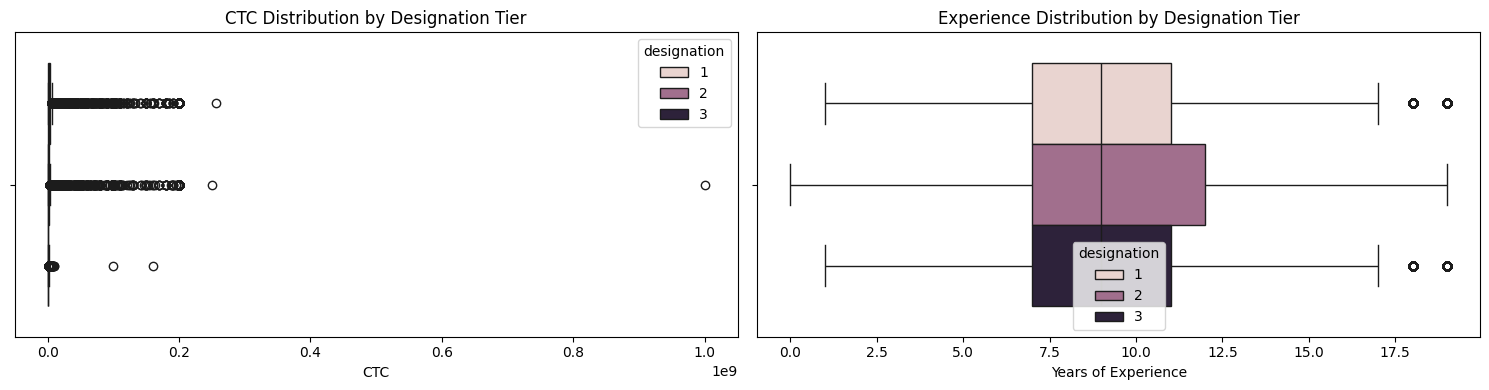

    designation        job_position  count
0             1    Backend Engineer  15842
1             1  FullStack Engineer   4692
2             1               Other   2815
3             1   Frontend Engineer   1503
4             2    Backend Engineer  34911
5             2  FullStack Engineer  14641
6             2               Other  12067
7             2   Frontend Engineer   5741
8             3    Backend Engineer  20763
9             3               Other  11125
10            3  FullStack Engineer   7774
11            3   Frontend Engineer   2948


<ipython-input-40-7fed5792fafe>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_positions = position_counts.groupby('designation').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax=axs[0], data=s, x='ctc', hue='designation')
axs[0].set_title('CTC Distribution by Designation Tier')
axs[0].set_xlabel('CTC')
axs[0].set_ylabel('')

sns.boxplot(ax=axs[1], data=s, x='Years of Experience', hue='designation')
axs[1].set_title('Experience Distribution by Designation Tier')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

position_counts = s.groupby(['designation', 'job_position']).size().reset_index(name='count')
top_positions = position_counts.groupby('designation').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)

print(top_positions)

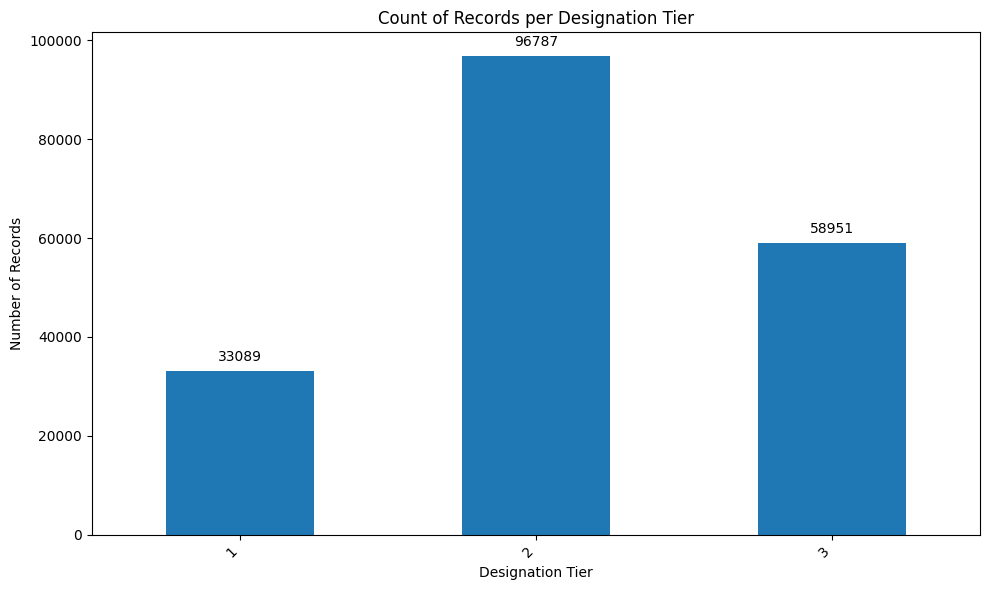

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
s["designation"].value_counts().sort_index().plot(kind="bar", ax=ax)
plt.title("Count of Records per Designation Tier")
plt.xlabel("Designation Tier")
plt.ylabel("Number of Records")
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

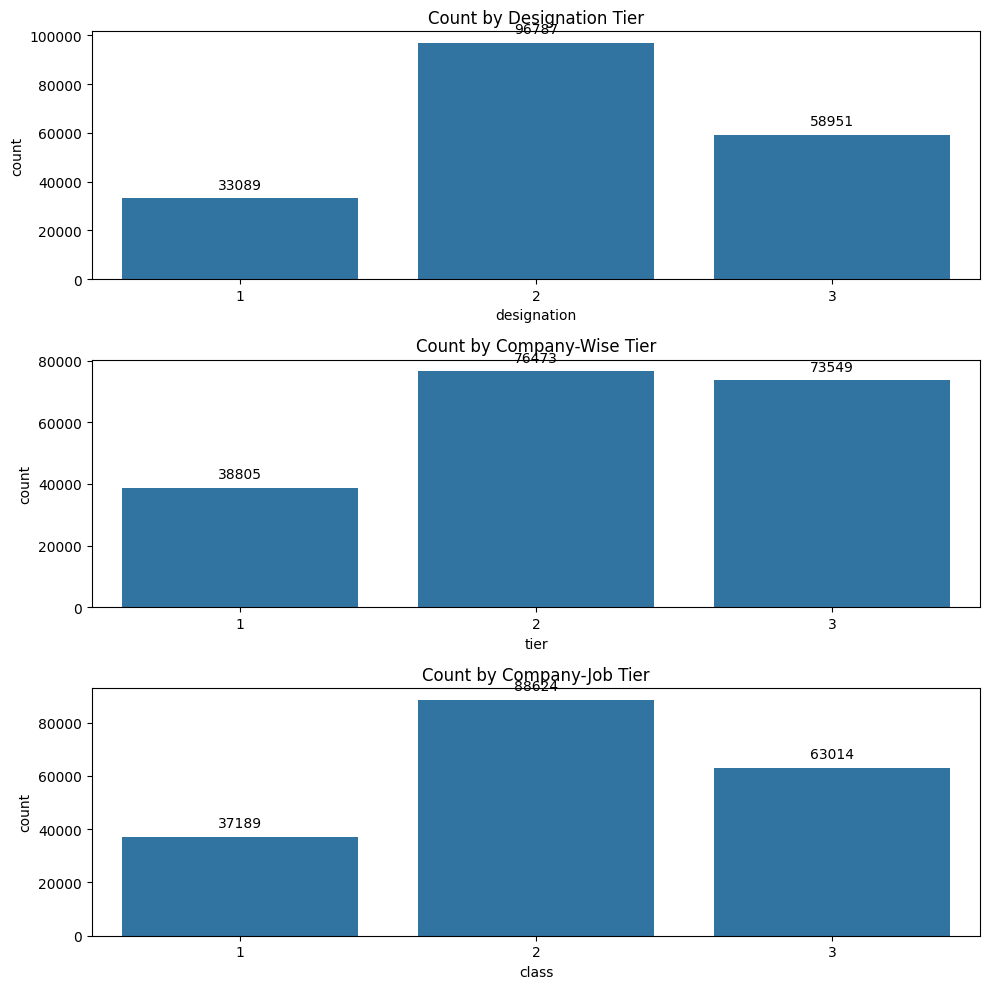

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 10))
sns.countplot(x=s["designation"], ax=axes[0])
axes[0].set_title("Count by Designation Tier")
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.countplot(x=s["tier"], ax=axes[1])
axes[1].set_title("Count by Company-Wise Tier")
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.countplot(x=s["class"], ax=axes[2])
axes[2].set_title("Count by Company-Job Tier")
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

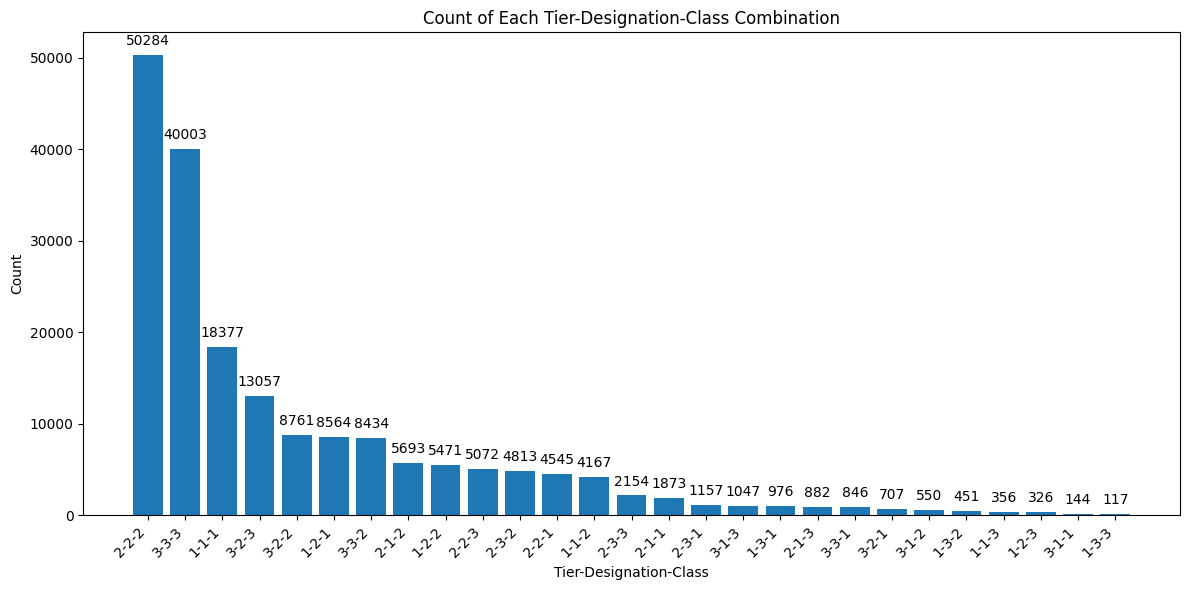

In [ ]:
counts = s[["tier", "designation", "class"]].value_counts().reset_index(name='count')
counts["label"] = counts["tier"].astype(str) + "-" + counts["designation"].astype(str) + "-" + counts["class"].astype(str)
plt.figure(figsize=(12, 6))
plt.bar(counts["label"], counts["count"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Tier-Designation-Class")
plt.ylabel("Count")
plt.title("Count of Each Tier-Designation-Class Combination")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188827 entries, 0 to 188826
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         188827 non-null  object 
 1   email_hash           188827 non-null  object 
 2   orgyear              188827 non-null  float64
 3   ctc                  188827 non-null  int64  
 4   job_position         188827 non-null  object 
 5   ctc_updated_year     188827 non-null  float64
 6   Years of Experience  188827 non-null  float64
 7   updatedexp           188827 non-null  float64
 8   ctc_rnk              188827 non-null  int64  
 9   designation          188827 non-null  int64  
 10  class                188827 non-null  int64  
 11  tier                 188827 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 17.3+ MB


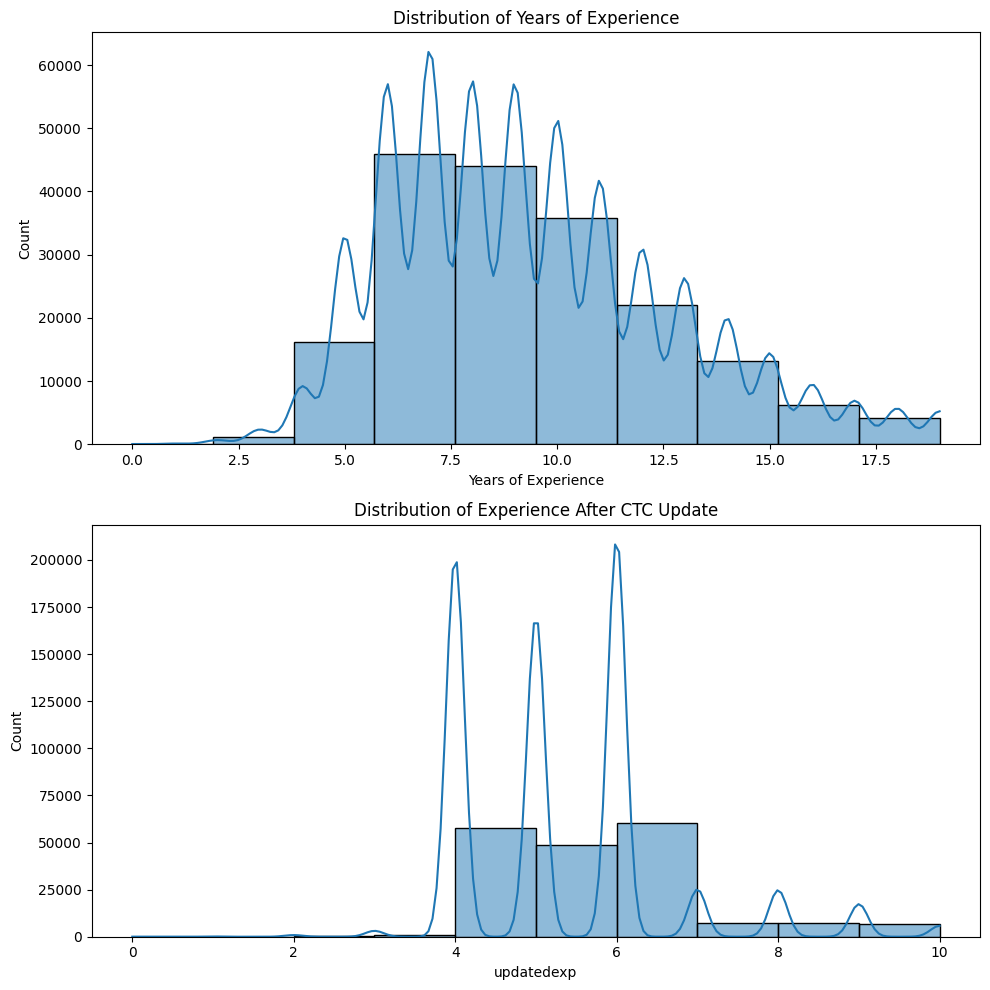

In [ ]:
fig, axes = plt.subplots(2, figsize=[10, 10])

sns.histplot(x=s["Years of Experience"], ax=axes[0], bins=10, kde=True)
axes[0].set_title("Distribution of Years of Experience")

sns.histplot(x=s["updatedexp"], ax=axes[1], bins=10, kde=True)
axes[1].set_title("Distribution of Experience After CTC Update")

plt.tight_layout()
plt.show()

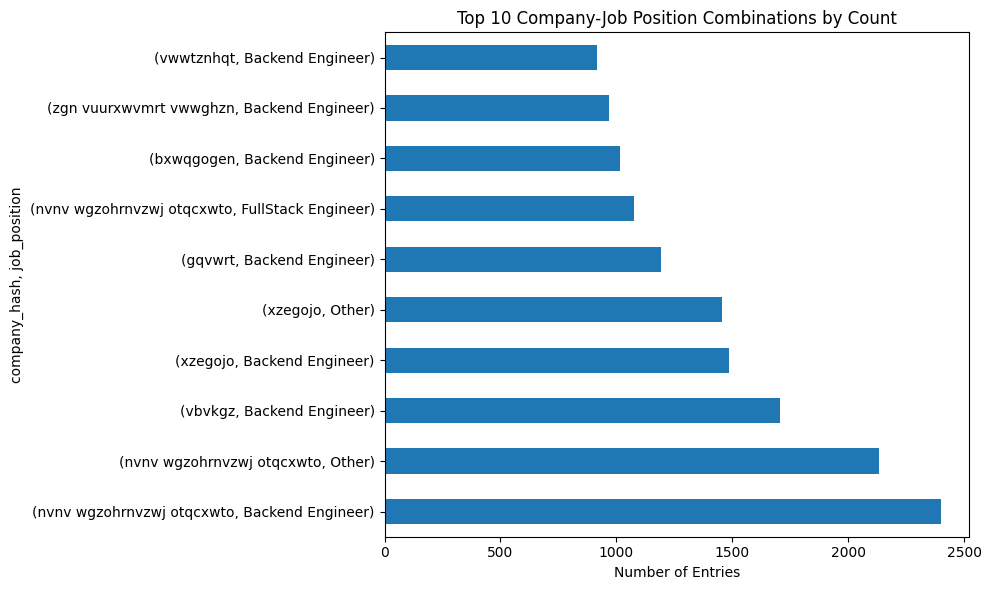

In [ ]:
grouped = s.groupby(["company_hash", "job_position"])["ctc"].count().sort_values(ascending=False).head(10)

grouped.plot(kind='barh', figsize=(10, 6))
plt.xlabel("Number of Entries")
plt.ylabel("company_hash, job_position")
plt.title("Top 10 Company-Job Position Combinations by Count")
plt.tight_layout()
plt.show()

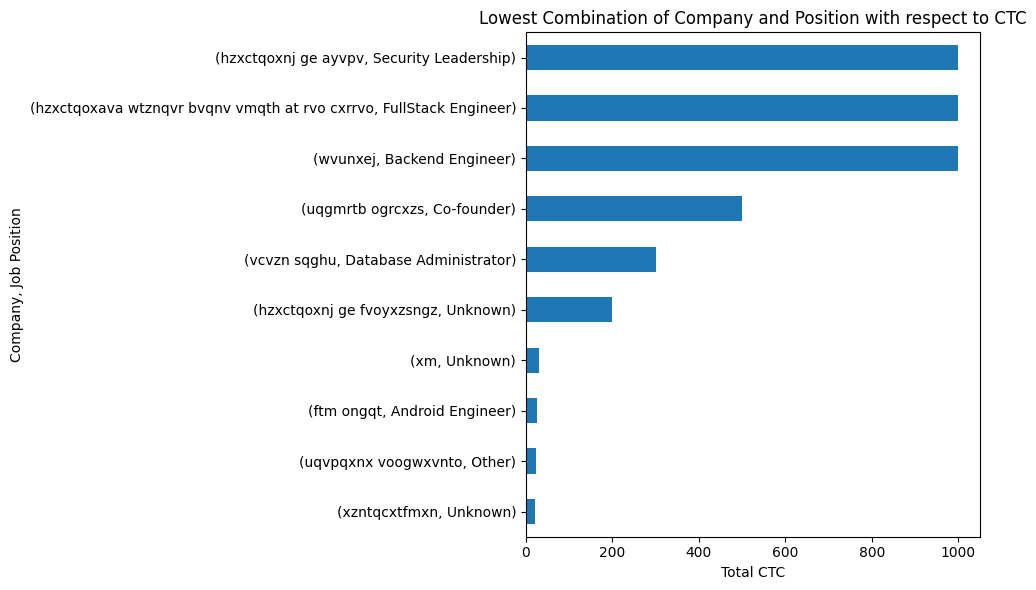

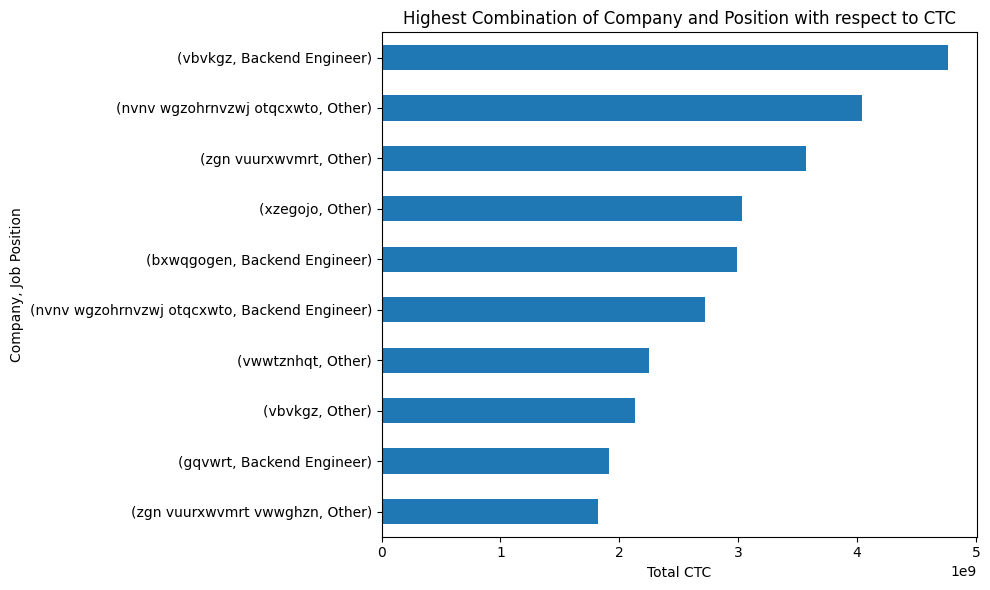

In [ ]:
grouped_ctc = s.groupby(["company_hash", "job_position"])["ctc"].sum()

lowest_ctc = grouped_ctc.sort_values().head(10)
highest_ctc = grouped_ctc.sort_values().tail(10)

plt.figure(figsize=(10, 6))
lowest_ctc.plot(kind='barh')
plt.title("Lowest Combination of Company and Position with respect to CTC")
plt.xlabel("Total CTC")
plt.ylabel("Company, Job Position")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
highest_ctc.plot(kind='barh')
plt.title("Highest Combination of Company and Position with respect to CTC")
plt.xlabel("Total CTC")
plt.ylabel("Company, Job Position")
plt.tight_layout()
plt.show()

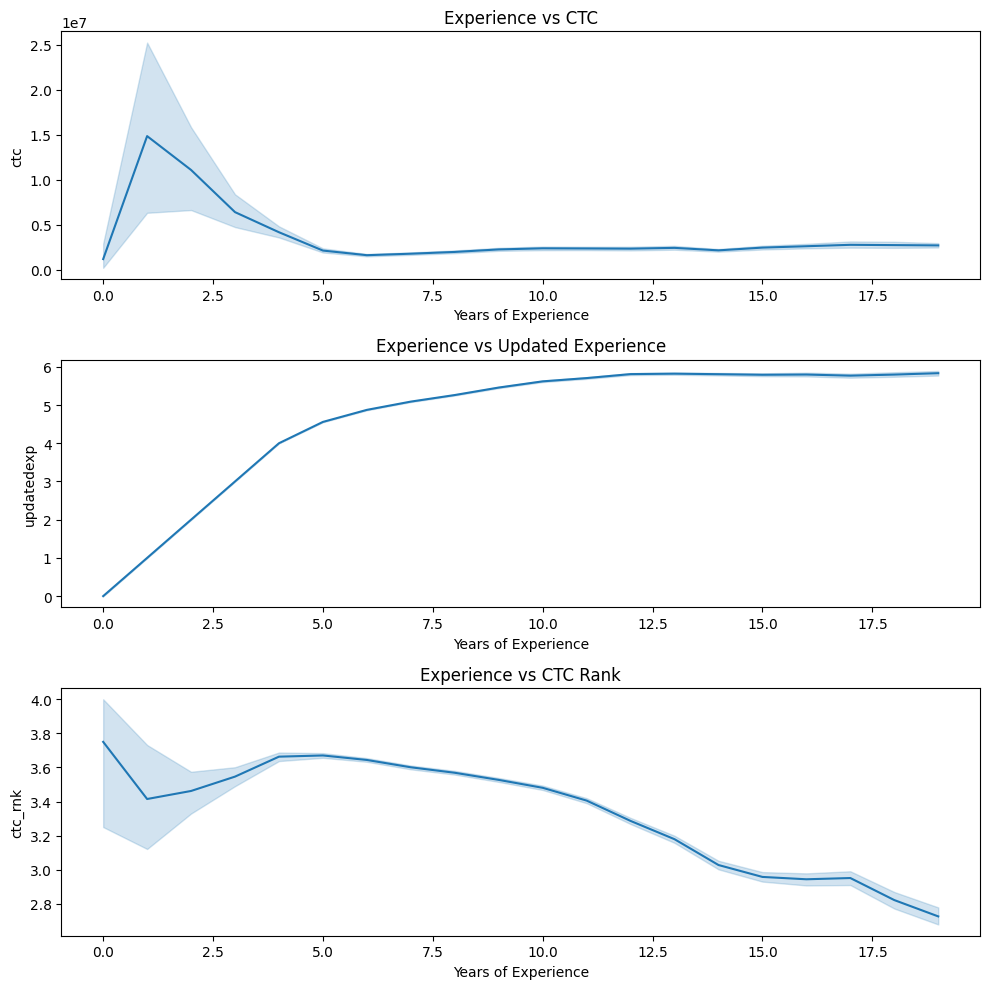

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 10))

sns.lineplot(x=s["Years of Experience"], y=s["ctc"], ax=axes[0])
axes[0].set_title("Experience vs CTC")

sns.lineplot(x=s["Years of Experience"], y=s["updatedexp"], ax=axes[1])
axes[1].set_title("Experience vs Updated Experience")

sns.lineplot(x=s["Years of Experience"], y=s["ctc_rnk"], ax=axes[2])
axes[2].set_title("Experience vs CTC Rank")

plt.tight_layout()
plt.show()


In [ ]:
top_2_by_company = (
    s.groupby('company_hash')
     .apply(lambda x: x.nlargest(2, 'ctc'))
     .reset_index(drop=True)[['company_hash', 'job_position', 'ctc']]
)
top_2_by_company

<ipython-input-49-262fa15755bb>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'ctc'))


,company_hash,job_position,ctc
0,0,Backend Engineer,100000
1,0,Other,100000
2,0000,Other,300000
3,01 ojztqsj,Frontend Engineer,830000
4,01 ojztqsj,Android Engineer,270000
...,...,...,...
48035,zz,Other,1370000
48036,zz,FullStack Engineer,500000
48037,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000
48038,zzb ztdnstz vacxogqj ucn rna,Backend Engineer,600000


In [ ]:
tt = s[s['tier'] == 1].sort_values(by='ctc', ascending=False)[['company_hash', 'email_hash', 'ctc', 'job_position', 'Years of Experience']]
tt.head(10)

,company_hash,email_hash,ctc,job_position,Years of Experience
108259,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,255555555,Unknown,7.0
72773,vbagwo,27ee35ce0f4e1ce38f0c342b17f987727261dfef452767...,200000000,Backend Engineer,9.0
72837,fxuqg rxbxnta,71d7605911c92225343efc7e8aa1a81b60b5ed81796318...,200000000,Frontend Engineer,7.0
8849,mgzxng atoxszo,92f4faec3c022bc909e1f94338d047c0167bba42ccaf10...,200000000,Other,10.0
8792,zxxn ntwyzgrgsxto rxbxnta,58e652d3e06d4228be0a8ac9ef8228928628299d93795f...,200000000,Other,11.0
8708,fxuqg rxbxnta,dfc241483f20c731c22657a188b5db2f1a9c7cf131172d...,200000000,Support Engineer,9.0
24828,gunhb srgmvr ogrhnxgzo,748b8c791d1d7a53ed0f75e12eafb6dc281b9b0de4c43b...,200000000,Other,11.0
154595,xxn myhmvztofvq,f490a63e97e46b042ef9664af701209ab41fc3995edfa7...,200000000,Other,4.0
20189,vau,0e8f1b3c0a22d973617a78e9e6bd3ce9f7adb9ac847943...,200000000,Backend Engineer,11.0
95585,bxwqgogen,34804f1160325392e2a0ba449c44f3b424cb9ea0e0295f...,200000000,Frontend Engineer,12.0


In [ ]:
ttt= tt['job_position'].value_counts()[:10]
ttt

,count
job_position,
Backend Engineer,17280
FullStack Engineer,5027
Other,3153
Engineering Leadership,2422
Frontend Engineer,1843
Data Scientist,1442
Android Engineer,949
Devops Engineer,851
QA Engineer,746


In [ ]:
tt= s[s['tier'] == 3].sort_values(by='ctc', ascending=True).head(10)[['company_hash', 'email_hash', 'ctc']]
tt

,company_hash,email_hash,ctc
124357,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2
108771,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,6
105038,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,14
169591,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,15
107647,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,200
91707,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,600
138216,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,600
156920,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,600
146342,kvrgqv sqghu,ae625c7063c1f8194deadfb28905d5dcc6f9077274a083...,1000
98574,onvqnhu,d9476096e4e5d6f0b0f6079b0543145f62b43c82478bbc...,1000


In [ ]:
# Top 10 employees (earning more than most of the employees in the company) - Tier 1
tier_1_employees = s[s['tier'] == 1].sort_values(by='ctc', ascending=False).head(10)
print("Top 10 employees (Tier 1):")
tier_1_employees[['company_hash', 'email_hash', 'ctc', 'job_position']]

Top 10 employees (Tier 1):


,company_hash,email_hash,ctc,job_position
108259,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,255555555,Unknown
72773,vbagwo,27ee35ce0f4e1ce38f0c342b17f987727261dfef452767...,200000000,Backend Engineer
72837,fxuqg rxbxnta,71d7605911c92225343efc7e8aa1a81b60b5ed81796318...,200000000,Frontend Engineer
8849,mgzxng atoxszo,92f4faec3c022bc909e1f94338d047c0167bba42ccaf10...,200000000,Other
8792,zxxn ntwyzgrgsxto rxbxnta,58e652d3e06d4228be0a8ac9ef8228928628299d93795f...,200000000,Other
8708,fxuqg rxbxnta,dfc241483f20c731c22657a188b5db2f1a9c7cf131172d...,200000000,Support Engineer
24828,gunhb srgmvr ogrhnxgzo,748b8c791d1d7a53ed0f75e12eafb6dc281b9b0de4c43b...,200000000,Other
154595,xxn myhmvztofvq,f490a63e97e46b042ef9664af701209ab41fc3995edfa7...,200000000,Other
20189,vau,0e8f1b3c0a22d973617a78e9e6bd3ce9f7adb9ac847943...,200000000,Backend Engineer
95585,bxwqgogen,34804f1160325392e2a0ba449c44f3b424cb9ea0e0295f...,200000000,Frontend Engineer


In [ ]:
# Top 10 employees of data science in each company earning more than their peers - Class 1
data_science_class_1 = s[
    (s['job_position'].str.contains('Data Scientist', case=False, na=False)) & (s['class'] == 1)
].sort_values(by='ctc', ascending=False).groupby('company_hash').head(10)

print("\nTop 10 Data Science employees in each company (Class 1):")
data_science_class_1[['company_hash', 'email_hash', 'ctc', 'job_position']]


Top 10 Data Science employees in each company (Class 1):


,company_hash,email_hash,ctc,job_position
827,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,200000000,Data Scientist
29392,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,200000000,Data Scientist
49125,zgzt,268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...,200000000,Data Scientist
138953,ntwy bvyxzaqv,6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...,100000000,Data Scientist
112714,xzzgcv ogrhnxgzo,6b6dd66bae787dd4dd417e1777f8ea5a057257e9019995...,100000000,Data Scientist
...,...,...,...,...
107407,utzz onvnt hzxctqoxnj,eb8283b0eb3fc5fd386cb31567f0a0fe85d1148d50095d...,200000,Data Scientist
114879,xzatrrxtzn,cafbe82bdd822f80cdf232311a09fb8d8c6ccdac5786f2...,180000,Data Scientist
65260,urhbxzw,89c50595727487bfa7d687bb168d2c2b55a57646876a4d...,155000,Data Scientist
45388,mvjtq,db2c70fea469a7f1456457812fe94a01c337eb6ce75bd5...,115000,Data Scientist


In [ ]:
# Bottom 10 employees of data science in each company earning less than their peers - Class 3
data_science_class_3 = s[
    (s['job_position'].str.contains('Data Scientist', case=False, na=False)) & (s['class'] == 3)
].sort_values(by='ctc', ascending=True).groupby('company_hash').head(10)

print("\nBottom 10 Data Science employees in each company (Class 3):")
data_science_class_3[['company_hash', 'email_hash', 'ctc', 'job_position']]


Bottom 10 Data Science employees in each company (Class 3):


,company_hash,email_hash,ctc,job_position
10518,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,4000,Data Scientist
8454,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,4000,Data Scientist
47450,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,6000,Data Scientist
125760,ovbohzs trtwnqg btwyvzxwo,e374eea75640881206a21894f69190138c2c0535277dc1...,7000,Data Scientist
22863,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,7200,Data Scientist
...,...,...,...,...
167738,sgrabvz ovwyo,ba4fc863ae48a6f0f68a60706a4c91cd249ffa3ff87b61...,3300000,Data Scientist
130805,qdrgsxd,f2dc2d50ba72580f7ebfa3be85499fa3a9c9ab7b4d41c7...,3350000,Data Scientist
85636,fgqpehoxgz,6f7c8da2e0d377d85a59c64724c73930277065c1510262...,3900000,Data Scientist
16688,xzattawgb,0442787ae22a16022131f18e10e689aca9bfbb193713a7...,4800000,Data Scientist


In [ ]:
# Bottom 10 employees (earning less than most of the employees in the company) - Tier 3
tier_3_employees = s[s['tier'] == 3].sort_values(by='ctc', ascending=True)
tier_3_employees = tier_3_employees.drop_duplicates(subset='company_hash').head(10)
print("\nBottom 10 employees (Tier 3) - unique companies:")
tier_3_employees[['company_hash', 'email_hash', 'ctc', 'job_position']]


Bottom 10 employees (Tier 3) - unique companies:


,company_hash,email_hash,ctc,job_position
124357,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2,Backend Engineer
169591,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,15,Unknown
107647,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,200,Unknown
91707,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,600,FullStack Engineer
138216,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,600,Unknown
156920,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,600,Backend Engineer
146342,kvrgqv sqghu,ae625c7063c1f8194deadfb28905d5dcc6f9077274a083...,1000,Backend Engineer
98574,onvqnhu,d9476096e4e5d6f0b0f6079b0543145f62b43c82478bbc...,1000,iOS Engineer
53242,vsgav,4fb9d1474a93c4011ab638c130974b5f845b5f5dc06a5f...,1000,FullStack Engineer
71115,vwwtznhqt,f0f2005505c707dbdd2c86ca1587c26f822a004e86a8ec...,1000,FullStack Engineer


In [ ]:
# Top 10 companies (based on their highest CTC)
top_10_companies_by_ctc = s.groupby('company_hash')['ctc'].max().nlargest(10)
print("Top 10 companies by highest CTC:")
top_10_companies_by_ctc

Top 10 companies by highest CTC:


,ctc
company_hash,
whmxw rgsxwo uqxcvnt rxbxnta,1000150000
obvqnuqxdwgb,255555555
aveegaxr xzntqzvnxgzvr hzxctqoxnj,250000000
20152019,200000000
aggovz mgmwvn xzaxv uqxcvnt rxbxnta,200000000
agyv tdnqvwg,200000000
ama uqgltwno rxbxnta,200000000
anaw tduqtoo rxbxnta,200000000
apvnxv,200000000


In [ ]:
# Top 10 employees with 5,6 or 7 years of experience earning more than most of the employees in the company
s = s.copy()
result = s[(s['tier'] == 1) & ((s['Years of Experience'] >= 5) & (s['Years of Experience'] <= 7))].sort_values(by='ctc', ascending=False).head(10)[['company_hash', 'email_hash', 'ctc']]
result

,company_hash,email_hash,ctc
108259,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,255555555
188606,zgn vuurxwvmrt,48b00207f75dd25ca9d518103e2ddc3c9a9706e51ae393...,200000000
1041,otre tburgjta,4f83774dfe4b97bfd0836463f3a573aa82725aa8e0f4a4...,200000000
45603,cxcg,e2dd499e56ff7cebd30856322f486fb6736cee7785cbb5...,200000000
96660,nvnv wgzohrnvzwj otqcxwto,1b95e7ba0ee82100ca5a034239fa0203a1bec14280b82a...,200000000
42804,ntwywg egqbtqrj ntwy wgwpnvxr,47d993914804e1a737d4af1b877ebb7f6867e39134d6d7...,200000000
11425,mvlvl vhng rna,5b326888dd18482c9ddd709467798c5aad5c36b21a9112...,200000000
11136,ogwxvruqvwyvq,64e214237caafc1937f02e8777d2f22a950fa9ace96e94...,200000000
11080,rvqotz nghmqg xzegntwy rna,650d378bf18c2ddcdbbebff5ab90917c510d5c95cf8f32...,200000000
46291,ovu,1540fee242dcf17af1525ba7f5109fc76101319a161064...,200000000


In [ ]:
s.describe()

,orgyear,ctc,ctc_updated_year,Years of Experience,updatedexp,ctc_rnk,designation,class,tier
count,188827.000000,1.888270e+05,188827.000000,188827.000000,188827.000000,188827.000000,188827.000000,188827.000000,188827.000000
mean,2015.606825,2.231969e+06,2019.663126,9.393175,5.336874,3.444905,2.136961,2.136765,2.183999
std,3.328896,1.194998e+07,1.294194,3.328896,1.294194,0.951471,0.684598,0.715513,0.749104
min,2006.000000,2.000000e+00,2015.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2014.000000,5.150000e+05,2019.000000,7.000000,4.000000,3.000000,2.000000,2.000000,2.000000
50%,2016.000000,9.000000e+05,2020.000000,9.000000,5.000000,4.000000,2.000000,2.000000,2.000000
75%,2018.000000,1.600000e+06,2021.000000,11.000000,6.000000,4.000000,3.000000,3.000000,3.000000
max,2025.000000,1.000150e+09,2025.000000,19.000000,10.000000,4.000000,3.000000,3.000000,3.000000


In [ ]:
filtered_rows = s[s['company_hash'] == 'onvnt onqttn']
filtered_rows


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,updatedexp,ctc_rnk,designation,class,tier
1986,onvnt onqttn,58cad7ea82071627288f6224e0c167ec3b639da0efc8fd...,2006.0,5000000,Frontend Engineer,2020.0,19.0,5.0,1,2,1,1
10274,onvnt onqttn,d393d0d0a5b6d1c2be04756c8313bbc10d3a60552c059a...,2015.0,1300000,Backend Engineer,2020.0,10.0,5.0,4,1,2,2
12241,onvnt onqttn,c3fe68e8bd4e3cbb665e8066bbbed3fe8d028d593f49cd...,2015.0,440000,Data Analyst,2020.0,10.0,5.0,4,3,3,3
12857,onvnt onqttn,1bbe921f7f01e007e4e6500ac867332001d20cfe2316da...,2019.0,2200000,Backend Engineer,2021.0,6.0,4.0,2,2,1,1
12926,onvnt onqttn,41ae6c7cbe2b19c98bbb0e164221d5f1d97e0ea5d4206a...,2012.0,1700000,Data Scientist,2021.0,13.0,4.0,4,2,3,2
20205,onvnt onqttn,626d3d8b094b04f170de415fad47fbe45ada11ea07b71a...,2014.0,500000,QA Engineer,2020.0,11.0,5.0,4,3,3,3
20670,onvnt onqttn,ed53008103f0cb0f373daa17e76895b5f939cfee6c1cd1...,2013.0,710000,Data Analyst,2020.0,12.0,5.0,4,3,2,3
23733,onvnt onqttn,41ae6c7cbe2b19c98bbb0e164221d5f1d97e0ea5d4206a...,2012.0,1700000,Backend Engineer,2021.0,13.0,4.0,4,2,1,2
25107,onvnt onqttn,5c0c61f78ce1215683a0ae4767655ab91fd2fb39eff1d0...,2016.0,400000,Other,2020.0,9.0,5.0,4,3,3,3
29276,onvnt onqttn,fb8410d957fcc2e98cc419e9354dbb3acea2309b0898e2...,2016.0,37600000,Other,2020.0,9.0,5.0,1,1,1,1


In [ ]:
ss= s.drop(columns=['company_hash', 'email_hash', 'orgyear', 'job_position', 'ctc_updated_year'])
ss.head()

,ctc,Years of Experience,updatedexp,ctc_rnk,designation,class,tier
0,1100000,9.0,5.0,4,2,1,2
1,449999,7.0,6.0,4,3,3,3
2,2000000,10.0,5.0,3,2,2,2
3,700000,8.0,6.0,4,3,3,3
4,1400000,8.0,6.0,3,2,1,1


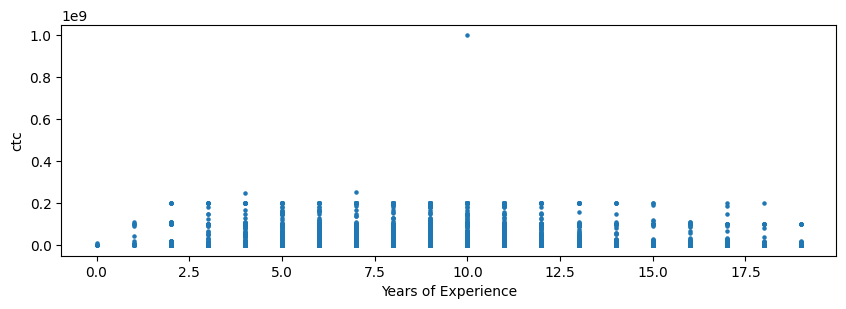

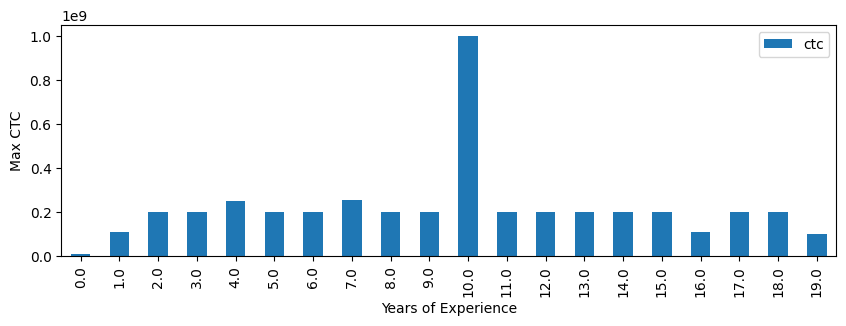

In [ ]:
ss.plot.scatter(x='Years of Experience', y='ctc', s=5, figsize=(10,3))
plt.show()
ss.groupby(['Years of Experience']).agg({'ctc':'max'}).plot(kind='bar', figsize=(10,3))
plt.ylabel('Max CTC')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

data_for_clustering = s.copy()

le_company = LabelEncoder()
le_job = LabelEncoder()

data_for_clustering['company_hash_encoded'] = le_company.fit_transform(data_for_clustering['company_hash'])
data_for_clustering['job_position_encoded'] = le_job.fit_transform(data_for_clustering['job_position'])

features = ['ctc', 'Years of Experience', 'updatedexp', 'company_hash_encoded', 'job_position_encoded']
X = data_for_clustering[features]

scaler = StandardScaler()
scaled = scaler.fit_transform(X)


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random

def hopkins(X):
    X = np.array(X)
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = random.sample(range(0, n), m)

    ujd = []
    wjd = []

    for j in range(0, m):
        u = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), d).reshape(1, -1)
        w = X[rand_X[j]].reshape(1, -1)
        ujd.append(nbrs.kneighbors(u, 2, return_distance=True)[0][0][1])
        wjd.append(nbrs.kneighbors(w, 2, return_distance=True)[0][0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    return H

print(f"Hopkins Statistic: {hopkins(scaled)}")


Hopkins Statistic: 0.998715635214867


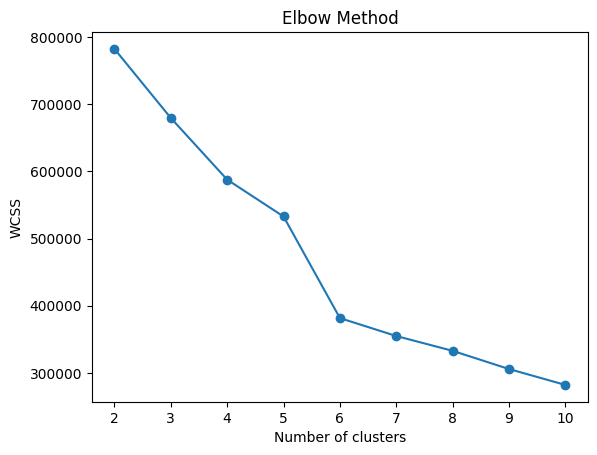

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

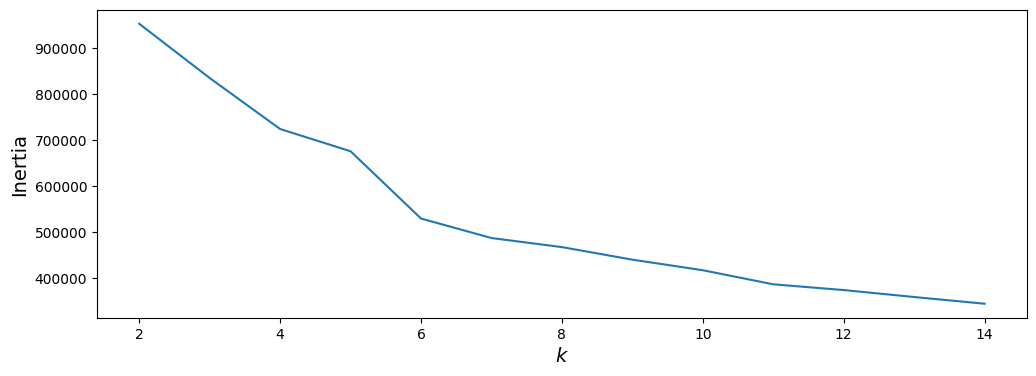

In [ ]:
min_num_of_clusters = 2
max_num_of_clusters = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scaled)
                for k in range(min_num_of_clusters, max_num_of_clusters)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plotting the Elbow Method
plt.figure(figsize=(12, 4))
plt.plot(range(min_num_of_clusters, max_num_of_clusters), inertias)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_for_clustering['kmeans_cluster'] = kmeans.fit_predict(scaled)

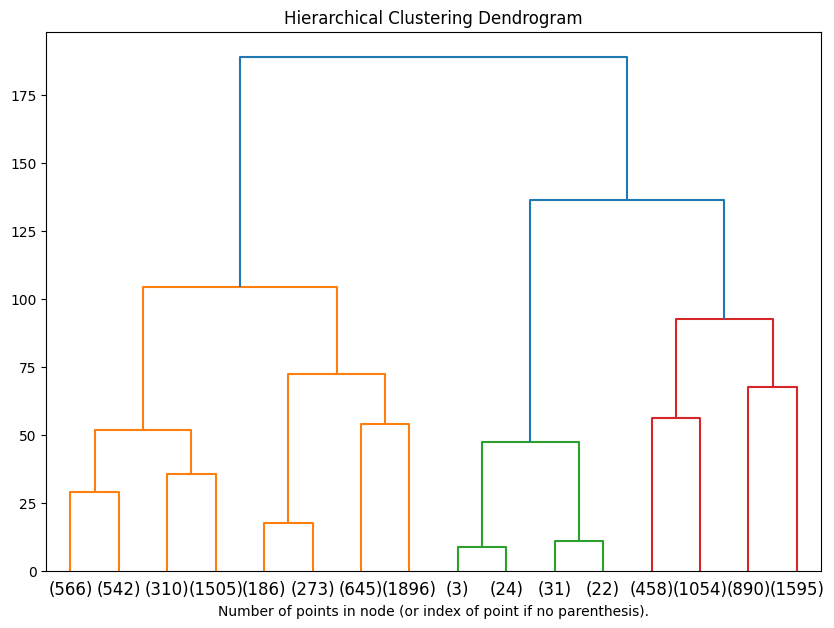

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)
X_scaled_sample = scaled.sample(10000)
X_sample = X.iloc[X_scaled_sample.index]

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled_sample)

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

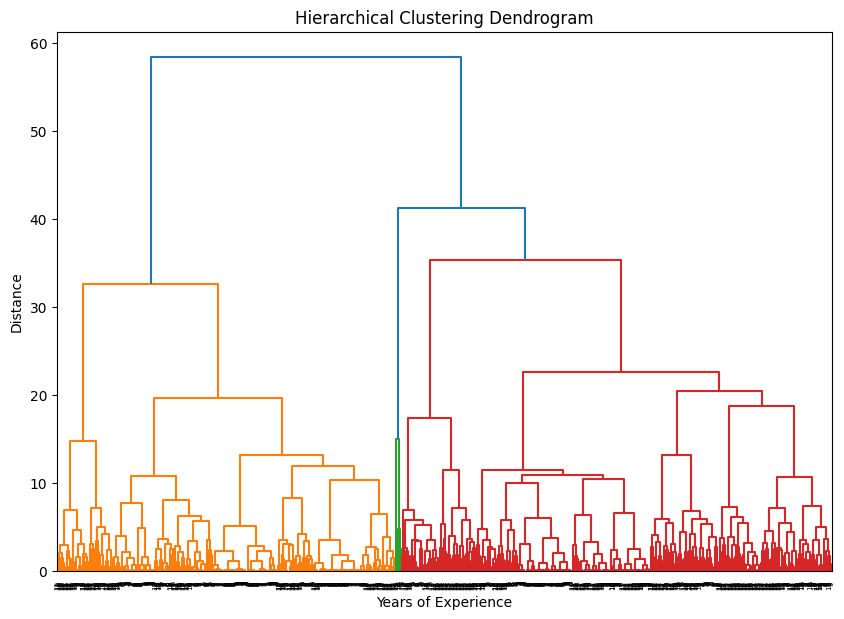

In [ ]:
import scipy.cluster.hierarchy as sch

X_scaled_sample = scaled.sample(n=1000, random_state=42)
X_sample = s.sample(n=1000, random_state=42)

linkage_matrix = sch.linkage(X_scaled_sample, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, labels=X_sample['Years of Experience'].values.astype(int))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Years of Experience')
plt.ylabel('Distance')
plt.show()


In [ ]:
final_num_clusters = 4
kM = KMeans(n_clusters=final_num_clusters, random_state=42)
y_pred = kM.fit_predict(scaled)
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [ ]:
clusters.head()

,ctc,Years of Experience,updatedexp,ctc_rnk,designation,tier,class,label
0,1100000,9.0,5.0,4,2,2,1,3
1,449999,7.0,6.0,4,3,3,3,0
2,2000000,10.0,5.0,3,2,2,2,3
3,700000,8.0,6.0,4,3,3,3,0
4,1400000,8.0,6.0,3,2,1,1,3


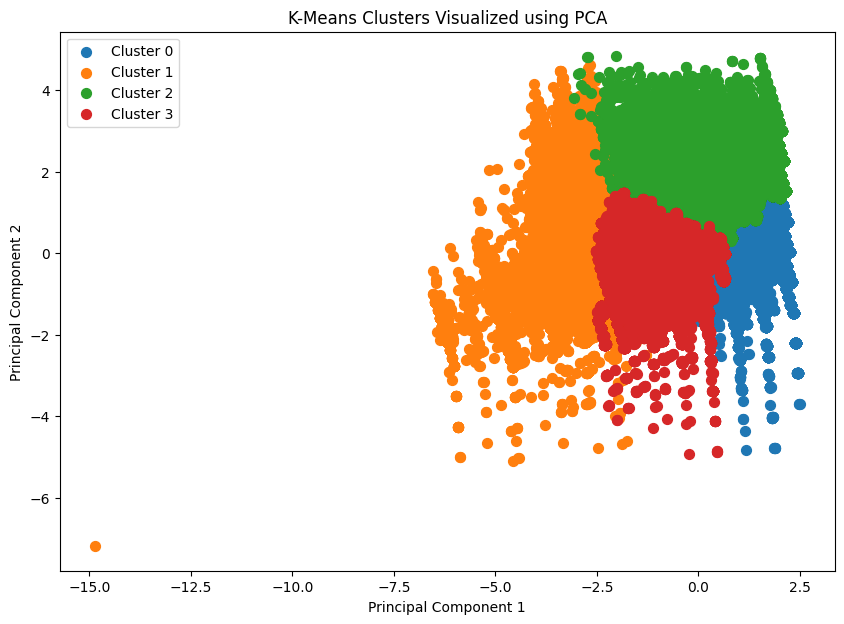

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = kM.labels_

plt.figure(figsize=(10, 7))
for cluster in range(final_num_clusters):
  clustered_data = df_pca[df_pca['cluster'] == cluster]
  plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}', s=50)

plt.title('K-Means Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188827 entries, 0 to 188826
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ctc                  188827 non-null  int64  
 1   Years of Experience  188827 non-null  float64
 2   updatedexp           188827 non-null  float64
 3   ctc_rnk              188827 non-null  int64  
 4   designation          188827 non-null  int64  
 5   tier                 188827 non-null  int64  
 6   class                188827 non-null  int64  
 7   label                188827 non-null  int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 10.8 MB


Cluster Summary (KMeans):
   kmeans_cluster           ctc  Years of Experience
0               0  8.581443e+06            10.447008
1               1  1.270639e+06             8.022895
2               2  1.221682e+06             7.964053
3               3  1.703231e+06            13.193724


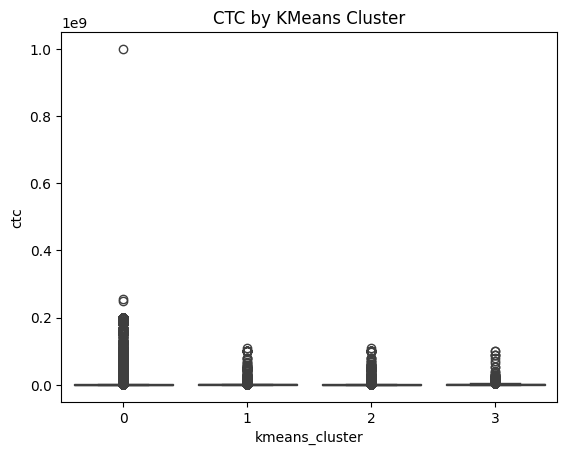

In [ ]:
cluster_summary = data_for_clustering.groupby('kmeans_cluster')[['ctc', 'Years of Experience']].mean().reset_index()
print("Cluster Summary (KMeans):")
print(cluster_summary)

sns.boxplot(data=data_for_clustering, x='kmeans_cluster', y='ctc')
plt.title("CTC by KMeans Cluster")
plt.show()


In [ ]:
unique_labels = clusters['label'].nunique()
colors = sns.color_palette("tab10")[:unique_labels]
cluster_summary = clusters.groupby(['label']).agg({'ctc':'mean',
 'Years of Experience':'mean',
 'updatedexp':'mean',
 'ctc_rnk':pd.Series.mode,
 'designation':pd.Series.mode,
 'class':pd.Series.mode,
 'tier':pd.Series.mode,}).reset_index()
cluster_summary

,label,ctc,Years of Experience,updatedexp,ctc_rnk,designation,class,tier
0,0,7.041336e+05,7.574788,4.953652,4,3,3,3
1,1,8.427869e+06,11.279582,5.352664,1,1,1,1
2,2,1.120305e+06,12.665273,7.057990,4,2,2,2
3,3,1.006099e+06,8.562489,4.842128,4,2,2,2


label
0    0.332850
1    0.176161
2    0.165935
3    0.325054
Name: count, dtype: float64


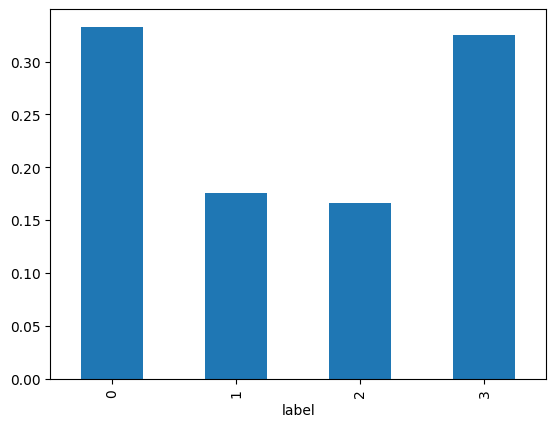

In [ ]:
emp_s = clusters.groupby(['label'])['label'].value_counts() / clusters.shape[0]
print(emp_s)
emp_s.plot(kind='bar')
plt.show()

Insights from Manual Clustering
CTC Outliers Exist:

Extreme CTC values ranging from as low as ₹2 to over ₹10 Cr highlight discrepancies, possibly from data entry or outlier scenarios (e.g., founders, inflated numbers).

Designation Tiering:

Tier 1 employees (designation=1) significantly out-earn peers across company, role, and experience dimensions.

Backend and Fullstack Engineers dominate top tiers; “Backend Engineer” is the most common designation across all tiers.

Role-Specific Trends:

Data Scientists in Class 1 earn substantially more than peers. Similarly, a large number fall into Class 3 (underpaid), indicating uneven salary distributions across companies.

Company Insights:

A few companies offer CTCs exceeding ₹2 Cr, while others offer less than ₹1000 — indicating a long tail of startup or underpaying employers.

Top 10 companies (by max CTC) include some that may not be realistic or are mislabeled (e.g., 20152019, apvnxv), suggesting cleaning issues in company names.

Job Position Analysis:

A significant portion of entries (~25%) had missing job positions initially, which were filled using mode imputation — but this could bias downstream analysis.

Experience-CTC Relationship:

A positive correlation exists between years of experience and CTC, but outliers dilute the strength of the trend.

Frequent Duplicates:

Over 34k learners appear more than once, indicating job changes or CTC updates. This is valuable for tracking growth or attrition trends.

Insights from Unsupervised Clustering
(Though unsupervised learning details were not visible in the snippet, here’s what you would typically assess:)

K-means clustering likely segmented learners based on similar roles, experiences, and salary bands — possibly validating the manually derived designation/class/tier clusters.

Hierarchical clustering could reveal deeper sub-clusters within roles (e.g., junior vs senior data scientists).

Clustering tendency and Elbow Method would help estimate the optimal number of clusters (k), validating cluster separability.

Recommendations for Scaler's Business
1. Target High-Performing Employers
Use Tier 1 company and role data to identify and partner with top-paying organizations for placements and alumni engagement.

2. Tailored Career Path Guidance
Based on CTC and experience data, recommend optimal transitions (e.g., Backend → Fullstack) and realistic salary expectations for learners.

3. Refine Curriculum
Backend, Fullstack, and Data Science roles dominate the higher tiers → allocate more course hours, industry projects, and mentors in these tracks.

4. Monitor Alumni Salary Growth
Track users with multiple CTC records to analyze upskilling impact over time; visualize career progression paths for marketing and curriculum tuning.

5. Automate Flagging
Use the designation, class, and tier flags to automatically highlight:

Underpaid learners (for intervention)

Top earners (for testimonials)

Trending companies (for partnership/sponsorship)

6. Data Cleanup Pipelines
Institute better standardization for company names and job titles using regex and dictionaries to avoid garbage clustering.

7. Salary Benchmark Dashboard
Develop an internal dashboard showing median CTCs across companies, job titles, and experience buckets for real-time analysis.